### Name: Arunkumar Thangaraj
### Date: 09/01/2022
### Project 1
### Title: Heart disease prediction

### Business Problem: 

Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States. About 697,000 people in the United States died from heart disease in 2020, that is 1 in every 5 deaths. Every year about 805,000 Americans have a heart attack. Of these, 605,000 are a first heart attack and 200,000 happen in people who have already had a heart attack. Heart Disease is a term that refers to several types of heart conditions which include CHD, valves in the heart, and congestive heart failure. The most common type of heart disease is CHD. CHD occurs when a substance called plaque builds up that narrows the arteries in the heart. A heart attack occurs when an artery becomes completely blocked, resulting in a lack of blood flow to the heart. 

The direct and indirect costs of cardiovascular diseases and stroke in the United States are estimated at more than 286 billion. This includes 167 billion in direct costs associated with physicians and other health professionals, hospital and nursing home services, medications, home health care, and medical durables as well as $ 119 billion in indirect costs resulting from lost productivity, illness, and death.

Machine learning may be used to diagnose, detect, and forecast many disorders in the medical industry. The primary purpose of this study is to give clinicians a tool to detect cardiac problems at an early stage. As a result, it will be easier to deliver appropriate treatment to patients while avoiding serious effects. Already, statistical methods are central in assessing 
cardiovascular disease risk and U.S. prevention guidelines. Developing predictive models gives health professionals’ actionable information by quantifying a patient’s risk and guiding the prescription of drugs or other preventive measures. Cardiovascular disease risk is typically computed using clinical information, such as blood pressure and cholesterol levels, but rarely 
take social determinants, such as neighborhood-level factors, into account.

### Dataset

https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

The dataset is publicly available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [89]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn import metrics

### Loading Data

In [2]:
data = pd.read_csv('C:/Users/arun8/Desktop/MS/DSC680/Project1/framingham.csv')

### Dimension of the table

In [3]:
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (4238, 16)


### Look at the data

In [4]:
print(data.head(5))

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

### List of columns

In [5]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
data.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

### Data description

In [18]:
print("Describe Data")
print(data.describe())

Describe Data
              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316  

### EDA

0    3594
1     644
Name: TenYearCHD, dtype: int64
Risk of developing CHD in 10 years


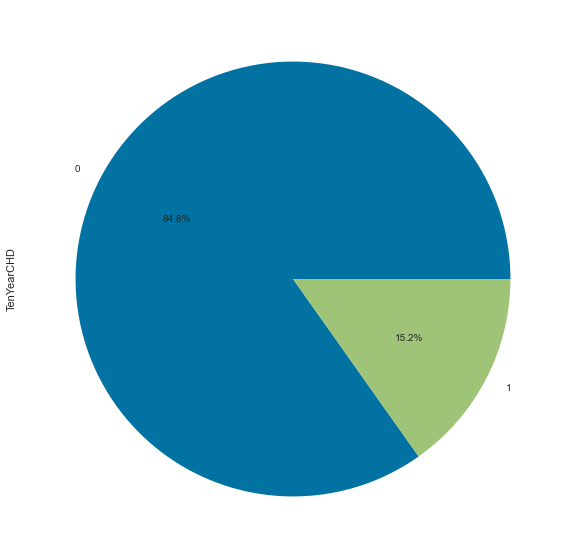

In [15]:
print(data["TenYearCHD"].value_counts())
data["TenYearCHD"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));
print("Risk of developing CHD in 10 years")

In [19]:
print(data.head(5))

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

### Histograms

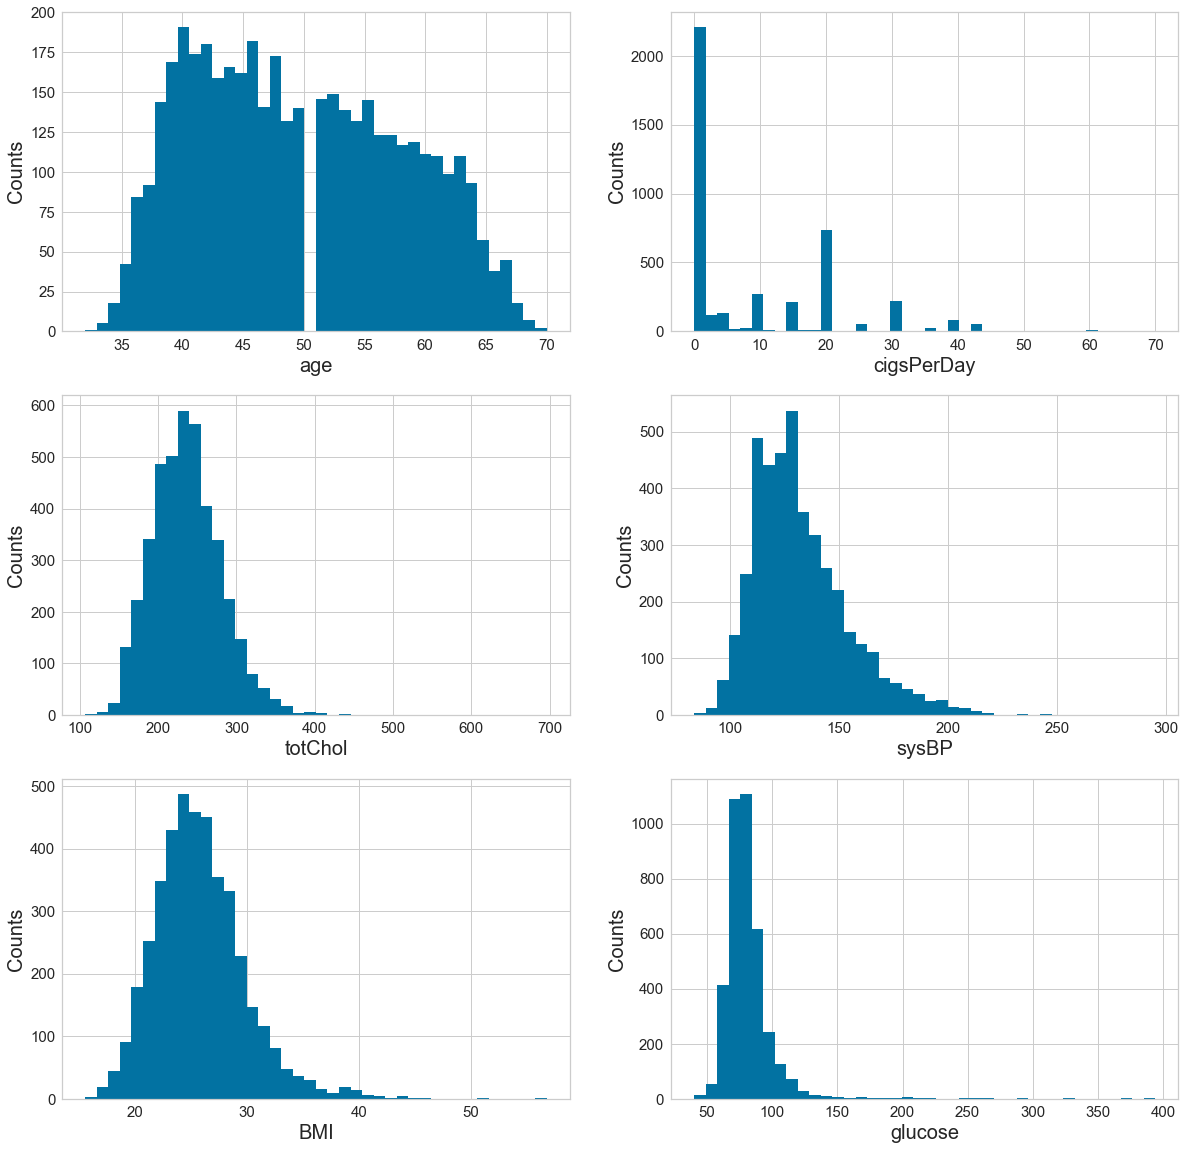

In [20]:
plt.rcParams['figure.figsize'] = (20, 20)
fig, axes = plt.subplots(nrows = 3, ncols = 2)
axes = axes.ravel()
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP','BMI', 'glucose']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts','Counts']
for idx, ax in enumerate(axes):
 ax.hist(data[num_features[idx]].dropna(), bins=40)
 ax.set_xlabel(xaxes[idx], fontsize=20)
 ax.set_ylabel(yaxes[idx], fontsize=20)
 ax.tick_params(axis='both', labelsize=15)
plt.show()

### Barcharts

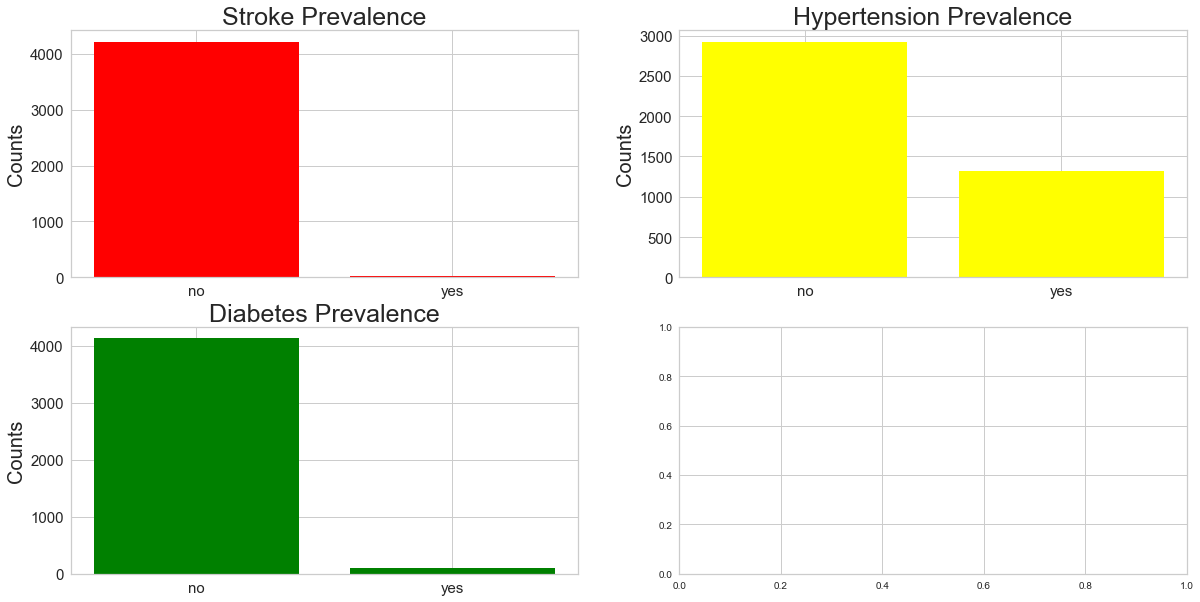

In [110]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 2, ncols = 2)

X_prevalentStroke = data.replace({'prevalentStroke': {1: 'yes', 0: 'no'}}).groupby('prevalentStroke').size().reset_index(name='Counts')['prevalentStroke']
Y_prevalentStroke = data.replace({'prevalentStroke': {1: 'yes', 0: 'no'}}).groupby('prevalentStroke').size().reset_index(name='Counts')['Counts']
axes[0, 0].bar(X_prevalentStroke, Y_prevalentStroke, color = 'Red')
axes[0, 0].set_title('Stroke Prevalence', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


X_prevalentHyp = data.replace({'prevalentHyp': {1: 'yes', 0: 'no'}}).groupby('prevalentHyp').size().reset_index(name='Counts')['prevalentHyp']
Y_prevalentHyp = data.replace({'prevalentHyp': {1: 'yes', 0: 'no'}}).groupby('prevalentHyp').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_prevalentHyp, Y_prevalentHyp, color = 'Yellow')
axes[0, 1].set_title('Hypertension Prevalence', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


X_diabetes = data.replace({'diabetes': {1: 'yes', 0: 'no'}}).groupby('diabetes').size().reset_index(name='Counts')['diabetes']
Y_diabetes = data.replace({'diabetes': {1: 'yes', 0: 'no'}}).groupby('diabetes').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_diabetes, Y_diabetes, color = 'Green')
axes[1, 0].set_title('Diabetes Prevalence', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)



### Scatter plots

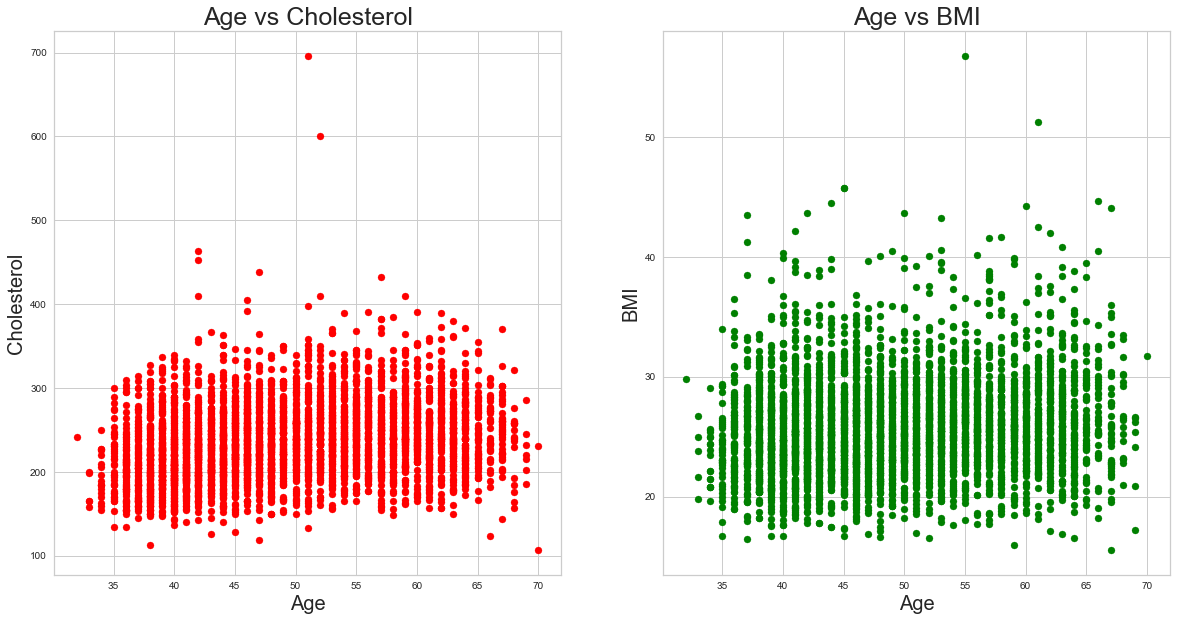

In [43]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 1, ncols = 2)

age = data['age']
totChol = data['totChol']
axes[0].scatter(age, totChol, color = 'Red')
axes[0].set_title('Age vs Cholesterol', fontsize=25)
axes[0].set_ylabel('Cholesterol', fontsize=20)
axes[0].set_xlabel('Age', fontsize=20)
axes[0].grid(True)

age = data['age']
BMI = data['BMI']
axes[1].scatter(age, BMI, color = 'green')
axes[1].set_title('Age vs BMI', fontsize=25)
axes[1].set_ylabel('BMI', fontsize=20)
axes[1].set_xlabel('Age', fontsize=20)
axes[1].grid(True)



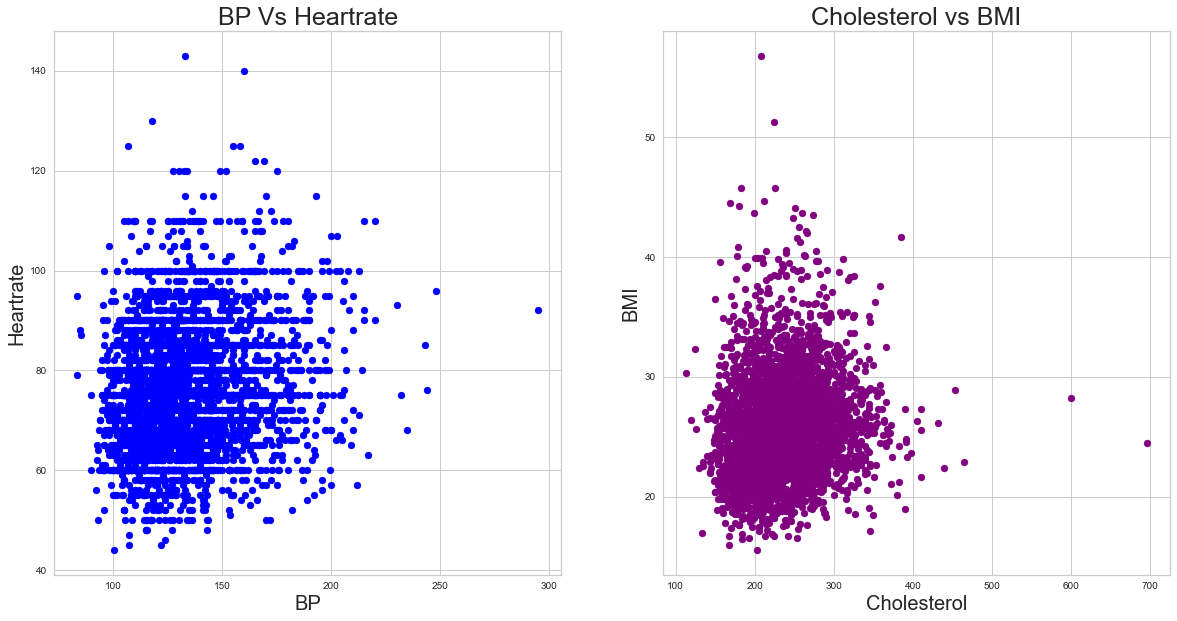

In [111]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 1, ncols = 2)

sysBP = data['sysBP']
heartRate = data['heartRate']
axes[0].scatter(sysBP, heartRate, color = 'Blue')
axes[0].set_title('BP Vs Heartrate', fontsize=25)
axes[0].set_ylabel('Heartrate', fontsize=20)
axes[0].set_xlabel('BP', fontsize=20)
axes[0].grid(True)

totChol = data['totChol']
BMI = data['BMI']
axes[1].scatter(totChol, BMI, color = 'Purple')
axes[1].set_title('Cholesterol vs BMI', fontsize=25)
axes[1].set_ylabel('BMI', fontsize=20)
axes[1].set_xlabel('Cholesterol', fontsize=20)
axes[1].grid(True)

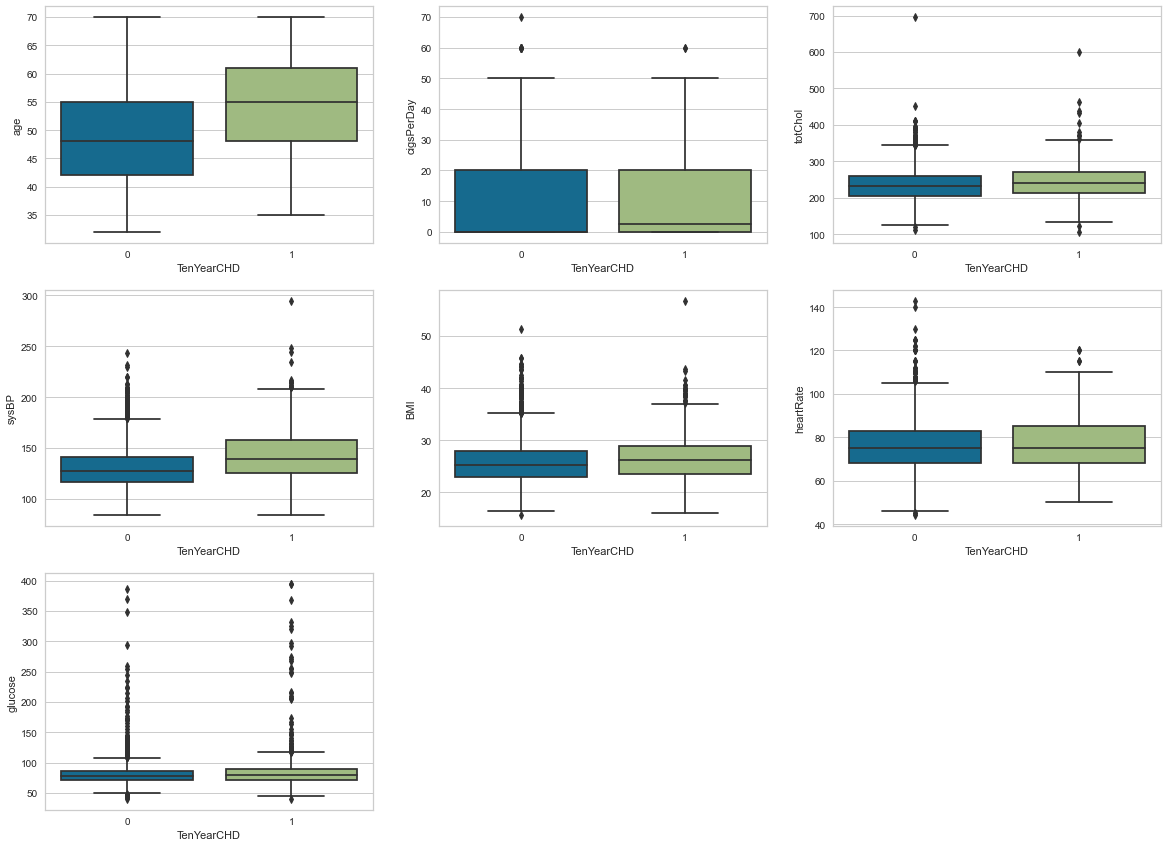

In [50]:
import seaborn as sns
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP','BMI', 'heartRate','glucose']
index = 0
plt.figure(figsize=(20,20))
for feature in num_features:
    if feature != "TenYearCHD":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='TenYearCHD', y=feature, data=data)

### Handling missing values

In [66]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [68]:
df = data.copy()

In [69]:
df = df.apply(lambda df: df.fillna(df.mean()),axis=0)
df.isnull().sum(axis = 0)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Correlation heat map

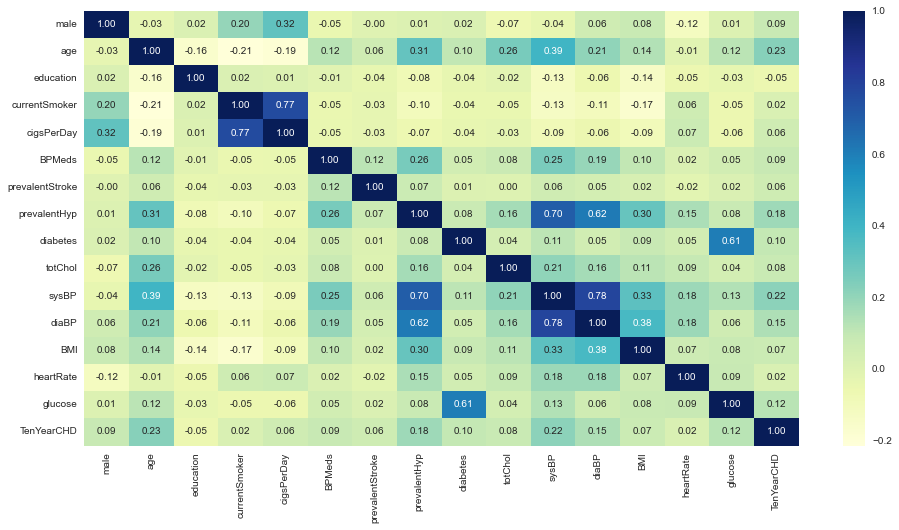

In [74]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

### Removing education as it has no correlation

In [75]:
df1 = df.drop(['education'], axis = 1)
df1

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


### Splitting data for training and test

In [76]:
x = df1.drop('TenYearCHD', axis = 1)
y = df1['TenYearCHD']
x

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [78]:
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2990,0,58,1,5.0,0.0,0,1,0,240.000000,150.0,84.0,26.85,75.0,94.0
429,1,65,0,0.0,0.0,0,0,0,236.721585,152.5,97.5,28.35,65.0,73.0
366,1,40,1,35.0,0.0,0,0,0,185.000000,133.0,80.0,21.86,63.0,58.0
1717,1,65,0,0.0,1.0,0,1,0,201.000000,166.0,93.0,28.16,54.0,91.0
2201,1,45,0,0.0,0.0,0,0,0,258.000000,128.0,79.0,32.03,70.0,75.0


In [80]:
y_train.head()

2990    1
429     0
366     0
1717    0
2201    0
Name: TenYearCHD, dtype: int64

In [81]:
y.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

### Logistic Regression Model

In [84]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

C:\Users\arun8\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
from sklearn.metrics import accuracy_score
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1076    5]
 [ 185    6]]


0.85062893081761

### Confusion Matrix

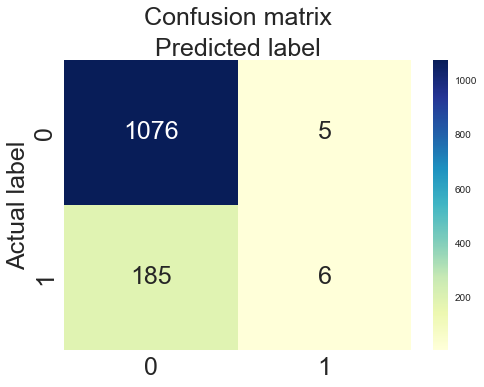

In [94]:
class_names=['No Heart disease','Heart disease'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sn.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1, fontsize=25)
plt.ylabel('Actual label', fontsize=25)
plt.xlabel('Predicted label', fontsize=25)
plt.rcParams["font.size"] = "25"
plt.tick_params(labelsize=25)
#plt.rcParams["figure.figsize"] = (7,5)

Confusion matrices are used to visualize important predictive analytics like recall, specificity, accuracy, and precision. Confusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives. In contrast, other machine learning classification metrics like “Accuracy” give less useful information, as Accuracy is simply the difference between correct predictions divided by the total number of predictions.

In [97]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1081
           1       0.55      0.03      0.06       191

    accuracy                           0.85      1272
   macro avg       0.70      0.51      0.49      1272
weighted avg       0.81      0.85      0.79      1272



I have used ROC curve for evaluation, ROC curve illustrates in a binary classifier system the discrimination threshold created by plotting the true positive rate vs false positive rate. The roc_auc_score always runs from 0 to 1, and is sorting predictive possibilities. 0.5 is the baseline for random guessing, so we want to always get above 0.5.

C:\Users\arun8\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


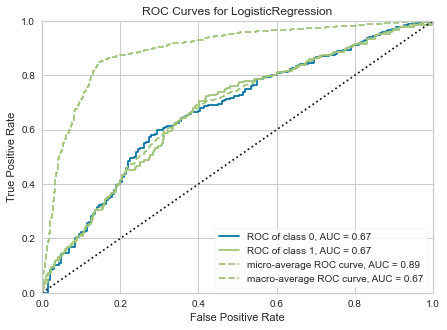

In [99]:
visualizer = ROCAUC(lr)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### KNN Model

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # build the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
y_pred = knn.predict(X_test)

In [103]:
print('Train Score is : ' , knn.score(X_train, y_train))
print('Test Score is : ' , knn.score(X_test, y_test))

Train Score is :  0.8594066082265678
Test Score is :  0.8427672955974843


In [104]:
from sklearn.metrics import classification_report

print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1081
           1       0.42      0.12      0.18       191

    accuracy                           0.84      1272
   macro avg       0.64      0.54      0.55      1272
weighted avg       0.79      0.84      0.80      1272



The accuracy score is: 0.8427672955974843

 Confusion matrix 
 
 [[1050   31]
 [ 169   22]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1081
           1       0.42      0.12      0.18       191

    accuracy                           0.84      1272
   macro avg       0.64      0.54      0.55      1272
weighted avg       0.79      0.84      0.80      1272



C:\Users\arun8\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


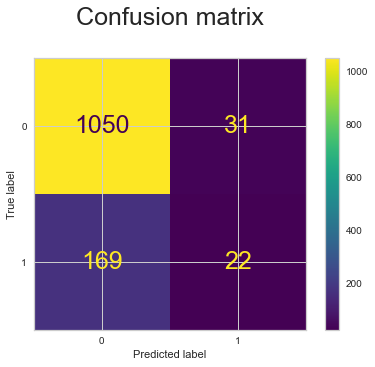

In [109]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

print('The accuracy score is:', accuracy_score(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred)
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

plot_confusion_matrix(knn, X_test, y_test) # 
plt.title('Confusion matrix', y=1.1, fontsize=25)
plt.show()